# 4주차 실습문제: 조건에 따른 열 추가 & 데이터 시각화

***

In [2]:
# 아래와 같이 필요한 라이브러리를 임포트 합니다.
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 한글 폰트 설정 (맑은고딕)
plt.rc('font', family='Malgun Gothic') # For Windows

# 소수점 3자리 숫자까지 표시
%precision 3

'%.3f'

In [3]:
data = pd.read_csv('health2018.csv')
data.head(5)

ID sex  age  height  weight  waist        BMI  Blood_glucose
0  A901020501   M   80   162.4    56.0   82.2  21.233226            103
1  A901021301   M   78   167.7    76.4   98.3  27.166096            127
2  A901021302   F   75   157.7    53.2   80.7  21.391845            134
3  A901022601   F   43   151.0    53.5   79.7  23.463883             99
4  A901023303   F   80   146.1    57.6   93.0  26.984977            111

## 1. 정상 vs. 비만 간의 통계량 비교 및 시각화
### 1-1) state 열을 추가해서 BMI >= 25인 사람은 'Obese', BMI < 25인 사람은 'Normal'으로 기록하시오.

In [12]:
data['obesity'] = np.where(data['BMI'] >= 25, 'Obease','Normal')
data

ID sex  age  height  weight  waist        BMI  Blood_glucose  \
0     A901020501   M   80   162.4    56.0   82.2  21.233226            103   
1     A901021301   M   78   167.7    76.4   98.3  27.166096            127   
2     A901021302   F   75   157.7    53.2   80.7  21.391845            134   
3     A901022601   F   43   151.0    53.5   79.7  23.463883             99   
4     A901023303   F   80   146.1    57.6   93.0  26.984977            111   
...          ...  ..  ...     ...     ...    ...        ...            ...   
5963  R904028502   F   35   159.8    55.6   70.1  21.773149             90   
5964  R904028503   F   66   156.9    63.9   87.3  25.957028             93   
5965  R904028902   F   73   145.2    51.8   77.2  24.569512             99   
5966  R904029201   M   43   176.8    84.1   99.2  26.904906            108   
5967  R904029202   F   39   163.1    59.5   81.2  22.367067             94   

     obesity  
0     Normal  
1     Obease  
2     Normal  
3     Normal  
4     Obease  
...      ...  
5963  Normal  
5964  Obease  
5965  Normal  
5966  Obease  
5967  Normal  

[5968 rows x 9 columns]

### 1-2) 정상 vs. 비만인에서 혈당값(Blood_glucose)의 분포 차이를, boxplot과 violinplot로 그려 비교하시오.

<AxesSubplot:xlabel='obesity', ylabel='Blood_glucose'>

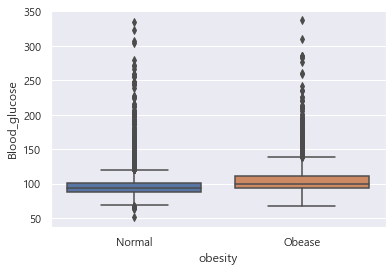

In [13]:
#boxplot으로 그리기
sns.boxplot(x = "obesity", y  = "Blood_glucose", data = data)

<AxesSubplot:xlabel='obesity', ylabel='Blood_glucose'>

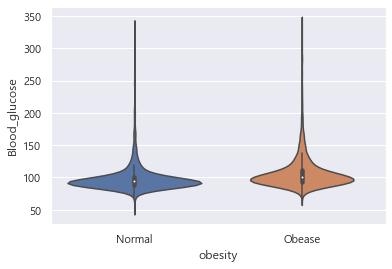

In [14]:
#violinplot으로 그리기
sns.violinplot(x = "obesity", y  = "Blood_glucose", data = data)

### 1-3) Diabete 열을 추가해서 혈당값이 126 이상인 환자를 1로, 그렇지 않은 정상인을 0으로 기록하고, 정상 체중과 비만 체중 각각에서 당뇨병 환자의 비율을 구하시오.

In [15]:
data['Diabete'] = np.where(data['Blood_glucose'] >= 126, 1,0)
data

ID sex  age  height  weight  waist        BMI  Blood_glucose  \
0     A901020501   M   80   162.4    56.0   82.2  21.233226            103   
1     A901021301   M   78   167.7    76.4   98.3  27.166096            127   
2     A901021302   F   75   157.7    53.2   80.7  21.391845            134   
3     A901022601   F   43   151.0    53.5   79.7  23.463883             99   
4     A901023303   F   80   146.1    57.6   93.0  26.984977            111   
...          ...  ..  ...     ...     ...    ...        ...            ...   
5963  R904028502   F   35   159.8    55.6   70.1  21.773149             90   
5964  R904028503   F   66   156.9    63.9   87.3  25.957028             93   
5965  R904028902   F   73   145.2    51.8   77.2  24.569512             99   
5966  R904029201   M   43   176.8    84.1   99.2  26.904906            108   
5967  R904029202   F   39   163.1    59.5   81.2  22.367067             94   

     obesity  Diabete  
0     Normal        0  
1     Obease        1  
2     Normal        1  
3     Normal        0  
4     Obease        0  
...      ...      ...  
5963  Normal        0  
5964  Obease        0  
5965  Normal        0  
5966  Obease        0  
5967  Normal        0  

[5968 rows x 10 columns]

In [16]:
normal_no_diabete = len(data[(data.obesity=='Normal') & (data.Diabete == 0)]) # 정상 환자 아님
normal_no_diabete

3651

In [17]:
normal_diabete = len(data[(data.obesity=='Normal') & (data.Diabete == 1)]) # 정상 환자
normal_diabete

247

In [18]:
obease_no_diabete = len(data[(data.obesity=='Obease') & (data.Diabete == 0)]) # 비만 환자아님
obease_no_diabete

1799

In [19]:
obease_diabete = len(data[(data.obesity=='Obease') & (data.Diabete == 1)]) # 비만 환자
obease_diabete

271

In [20]:
#정상 중 당뇨병 환자 비율
normal_rate = (normal_diabete)/(normal_no_diabete+normal_diabete) * 100
normal_rate

6.337

In [21]:
#비만중 당뇨병 환자 비율
obease_rate = (obease_diabete)/(obease_no_diabete+normal_diabete) * 100
obease_rate

13.245

***

## 2. 연령별 비만 유병율 시각화
### 2-1) 20대, 30대, 40대, 50대, 60대, 70대로 그룹을 나누고, 각 연령별 BMI의 분포를 violinplot으로 비교하시오.
x축 레이블로 20대, 30대, 40대, 50대, 60대, 70대가 명시되도록 할 것. (힌트: violinplot에 order=[...] 옵션으로 순서 지정). 아래 예시 참조.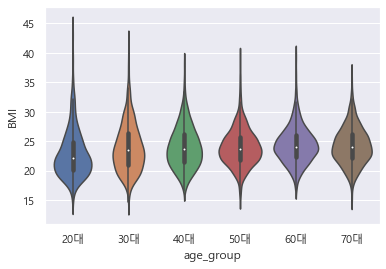

In [23]:
condition_list = [(data.age < 30), 
                  (data.age >=30 ) & (data.age < 40),
                  (data.age >=40 ) & (data.age < 50),
                  (data.age >=50 ) & (data.age < 60),
                  (data.age >=60 ) & (data.age < 70),
                  (data.age >= 70) ]
choice_list = [ 20,30,40,50,60,70 ]
data['age_group'] = np.select(condition_list, choice_list, default = 'NaN')
data

ID sex  age  height  weight  waist        BMI  Blood_glucose  \
0     A901020501   M   80   162.4    56.0   82.2  21.233226            103   
1     A901021301   M   78   167.7    76.4   98.3  27.166096            127   
2     A901021302   F   75   157.7    53.2   80.7  21.391845            134   
3     A901022601   F   43   151.0    53.5   79.7  23.463883             99   
4     A901023303   F   80   146.1    57.6   93.0  26.984977            111   
...          ...  ..  ...     ...     ...    ...        ...            ...   
5963  R904028502   F   35   159.8    55.6   70.1  21.773149             90   
5964  R904028503   F   66   156.9    63.9   87.3  25.957028             93   
5965  R904028902   F   73   145.2    51.8   77.2  24.569512             99   
5966  R904029201   M   43   176.8    84.1   99.2  26.904906            108   
5967  R904029202   F   39   163.1    59.5   81.2  22.367067             94   

     obesity  Diabete age_group  
0     Normal        0        70  
1     Obease        1        70  
2     Normal        1        70  
3     Normal        0        40  
4     Obease        0        70  
...      ...      ...       ...  
5963  Normal        0        30  
5964  Obease        0        60  
5965  Normal        0        70  
5966  Obease        0        40  
5967  Normal        0        30  

[5968 rows x 11 columns]

In [37]:
len(data[data.obesity=="Obease"])

2070

<AxesSubplot:xlabel='age_group', ylabel='BMI'>

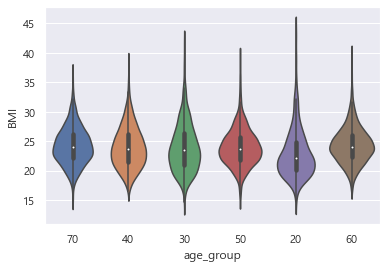

In [24]:
sns.violinplot(x = "age_group", y  = "BMI", data = data)

<AxesSubplot:xlabel='age_group', ylabel='BMI'>

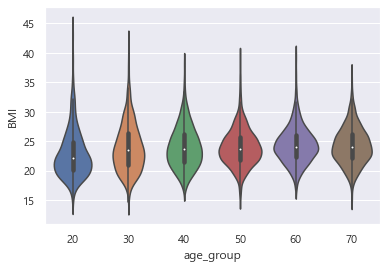

In [25]:
sns.violinplot(x = "age_group", y  = "BMI", data = data, order = ['20','30','40','50','60','70'])

### 2-2) 각 연령대별로 비만(BMI 25~30), 고도비만(BMI >= 30)인 사람의 비율을 구하시오.
obs_ratio, obs2_ratio로 각각 저장할 것.

In [41]:
total=[]
for i in ['20','30','40','50','60','70']:
    total.append(len(data[data.age_group==i]))
total

[737, 883, 1109, 1162, 1065, 1012]

In [42]:
condition_list = [(data.BMI >= 25) & (data.BMI < 30), 
                  (data.BMI >=30) ]
choice_list = [ '비만', '고도비만' ]
data['obs'] = np.select(condition_list, choice_list, default = '정상')
data

ID sex  age  height  weight  waist        BMI  Blood_glucose  \
0     A901020501   M   80   162.4    56.0   82.2  21.233226            103   
1     A901021301   M   78   167.7    76.4   98.3  27.166096            127   
2     A901021302   F   75   157.7    53.2   80.7  21.391845            134   
3     A901022601   F   43   151.0    53.5   79.7  23.463883             99   
4     A901023303   F   80   146.1    57.6   93.0  26.984977            111   
...          ...  ..  ...     ...     ...    ...        ...            ...   
5963  R904028502   F   35   159.8    55.6   70.1  21.773149             90   
5964  R904028503   F   66   156.9    63.9   87.3  25.957028             93   
5965  R904028902   F   73   145.2    51.8   77.2  24.569512             99   
5966  R904029201   M   43   176.8    84.1   99.2  26.904906            108   
5967  R904029202   F   39   163.1    59.5   81.2  22.367067             94   

     obesity  Diabete age_group obs  
0     Normal        0        70  정상  
1     Obease        1        70  비만  
2     Normal        1        70  정상  
3     Normal        0        40  정상  
4     Obease        0        70  비만  
...      ...      ...       ...  ..  
5963  Normal        0        30  정상  
5964  Obease        0        60  비만  
5965  Normal        0        70  정상  
5966  Obease        0        40  비만  
5967  Normal        0        30  정상  

[5968 rows x 12 columns]

In [43]:
obs, obs2, obs_ratio, obs2_ratio=[], [], [], []
for i in ['20','30','40','50','60','70']:
    obs.append(len(data[(obease_data.age_group==i) & (data.obs == "비만")]))
    obs2.append(len(data[(obease_data.age_group==i) & (data.obs == "고도비만")]))
print(obs)
print(obs2)

[129, 244, 334, 349, 358, 338]
[50, 69, 63, 41, 47, 48]


In [44]:
i=0
while i <=5:
    obs_ratio.append(obs[i]/total[i])
    obs2_ratio.append(obs2[i]/total[i])
    i+=1

# 순서대로 20-70대 
print(obs_ratio) 
print(obs2_ratio) 

[0.17503392130257803, 0.27633069082672707, 0.3011722272317403, 0.3003442340791738, 0.336150234741784, 0.3339920948616601]
[0.06784260515603799, 0.07814269535673839, 0.056807935076645624, 0.035283993115318414, 0.044131455399061034, 0.04743083003952569]


### 2-3) 연령대별 비만, 고도비만의 비율을 누적 막대그래프로 그리시오.
고도비만(BMI >= 30)을 아래쪽에 먼저 그리고, 비만(BMI: 25~30)을 그 위에 쌓는 꼴로 그리시오. (아래 예시 참조)
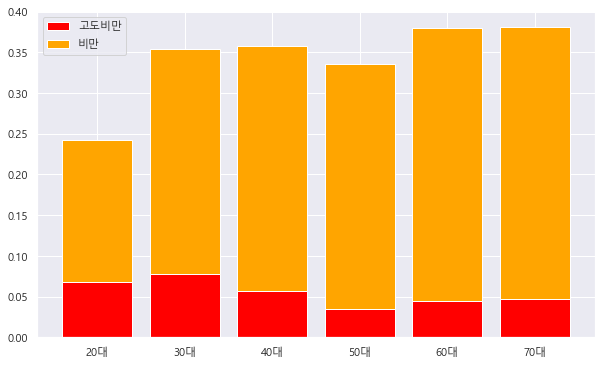

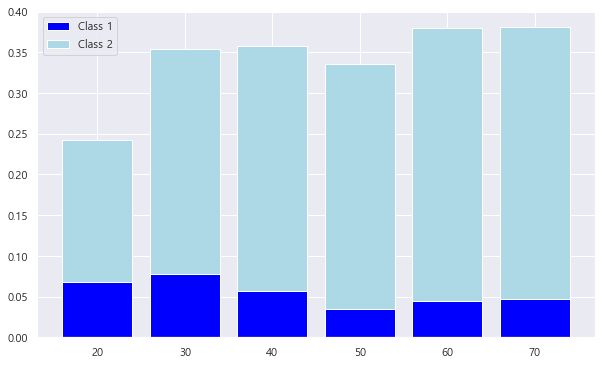

In [77]:
height1 = obs2_ratio
height2 = obs_ratio

x = np.array(['20','30','40','50','60','70']) 

plt.figure(figsize = (10, 6))

p1 = plt.bar(x, height1, color = 'blue')
p2 = plt.bar(x, height2, bottom = height1, color='lightblue') 

plt.legend((p1[0], p2[0]), ('Class 1', 'Class 2'))

### 2-4) (보너스 문제) 남성/여성으로 나누어서 위 2-3) 그래프를 그리고 그 차이를 비교해보시오.
연령별 비만 비율에서 남성 vs. 여성은 어떤 차이가 있는가? 

In [48]:
m_total,f_total=[],[]
for i in ['20','30','40','50','60','70']:
    m_total.append(len(data[(data.age_group==i) & (data.sex=="M")]))
    f_total.append(len(data[(data.age_group==i) & (data.sex=="F")]))
print(m_total)
print(f_total)

[354, 406, 469, 495, 482, 430]
[383, 477, 640, 667, 583, 582]


In [1]:
m_obs,f_obs, m_obs2,f_obs2 =[], [], [], []
for i in ["20","30","40","50","60","70"]:
    m_obs.append(len(data[(data.age_group==i) &(data.obs=="비만") & (data.sex=="M")]))
    f_obs.append(len(data[(data.age_group==i) & (data.obs=="비만") & (data.sex=="F")]))
    m_obs2.append(len(data[(data.age_group==i)&(data.obs=="고도비만") & (data.sex=="M")]))
    f_obs2.append(len(data[(data.age_group==i) &(data.obs=="고도비만") & (data.sex=="F")]))
print(m_obs)
print(f_obs)
print(m_obs2)
print(f_obs2)

NameError: name 'data' is not defined

In [72]:
m_obs_ratio, f_obs_ratio, m_obs2_ratio, f_obs2_ratio= [], [], [], []
i=0
while i <=5:
    m_obs_ratio.append(m_obs[i]/m_total[i])
    f_obs_ratio.append(f_obs[i]/f_total[i])
    m_obs2_ratio.append(m_obs2[i]/m_total[i])
    f_obs2_ratio.append(f_obs2[i]/f_total[i])
    i+=1

# 순서대로 20-70대 
print(m_obs_ratio)
print(f_obs_ratio)
print(m_obs2_ratio)
print(f_obs2_ratio) 

[0.2401129943502825, 0.4088669950738916, 0.4157782515991471, 0.3939393939393939, 0.3630705394190871, 0.2930232558139535]
[0.11488250652741515, 0.16352201257861634, 0.2171875, 0.23088455772113944, 0.313893653516295, 0.3642611683848797]
[0.10734463276836158, 0.10098522167487685, 0.07462686567164178, 0.022222222222222223, 0.026970954356846474, 0.03255813953488372]
[0.031331592689295036, 0.05870020964360587, 0.04375, 0.044977511244377814, 0.058319039451114926, 0.058419243986254296]


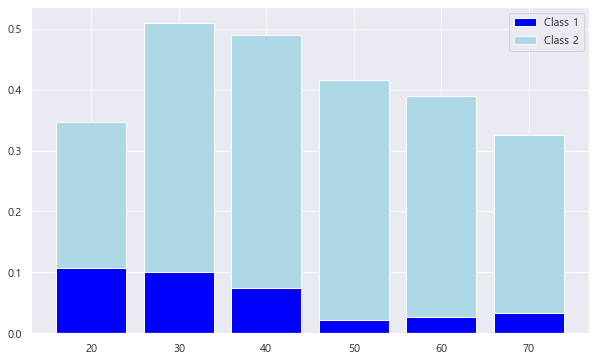

In [74]:
#남자 연령별 비만과 고도비만 비율
height1 = m_obs2_ratio
height2 = m_obs_ratio

x = np.array(['20','30','40','50','60','70']) 

plt.figure(figsize = (10, 6))

p1 = plt.bar(x, height1, color = 'blue')
p2 = plt.bar(x, height2, bottom = height1, color='lightblue') 

plt.legend((p1[0], p2[0]), ('Class 1', 'Class 2'))

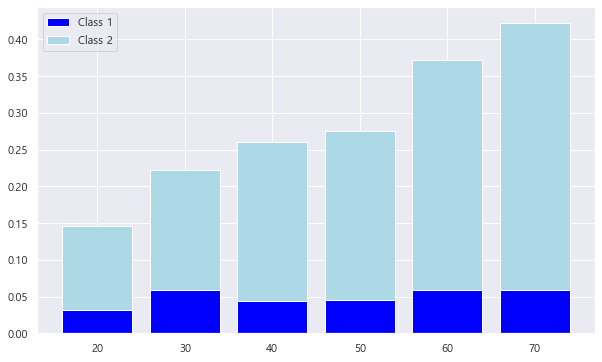

In [76]:
# 여자 연령별 비만과 고도비만 비율
height1 = f_obs2_ratio
height2 = f_obs_ratio

x = np.array(['20','30','40','50','60','70']) 

plt.figure(figsize = (10, 6))

p1 = plt.bar(x, height1, color = 'blue')
p2 = plt.bar(x, height2, bottom = height1, color='lightblue') 

plt.legend((p1[0], p2[0]), ('Class 1', 'Class 2'))
height3 = f_obs2_ratio
height4 = m_obs2_ratio

In [ ]:
#비만 비율은 남성에서는 젊은층이 조금 더 많은 비율을 차지함
#여성에게서는 연령대가 높아짐에 따라 비만비율도 같이 높아지는 양상을 확인할 수 있음
#남성의 고도비만 비율은 젊은층이 조금 더 많은 비중을 차지함
#여성의 고도비만 비율은 대체로 다 비슷하나, 고령층으로 갈수록 대체적으로 늘어나는 양상이 관측됨 